## ******* Violin plot, Box plot and Histogram for Ligandnet2 ********

### ******Import libraries******

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [2]:
# Load report file
df = pd.read_csv('Report2.csv')
df.head(2)

,Unnamed: 0,xgb_accuracy,xgb_f1_score,xgb_cohen_kappa,xgb_mcc,rf_accuracy,rf_f1_score,rf_cohen_kappa,rf_mcc,svc_accuracy,...,mlp_f1_score,mlp_cohen_kappa,mlp_mcc,train_count,test_count,actives_count,decoys_count,best_model,best_metric,best_score
0,P09038,0.9924,0.9923,0.9524,0.9535,0.9924,0.9923,0.9524,0.9535,1.0000,...,0.9923,0.9524,0.9535,528,132,60,600,svc,cohen_kappa,1.0000
1,P04818,0.9937,0.9936,0.9614,0.9616,0.9968,0.9968,0.9807,0.9809,0.9937,...,0.9936,0.9608,0.9616,2534,634,288,2880,rf,cohen_kappa,0.9807


### ****************Violin plots********************

### ******Violin plots for each evaluated metric******

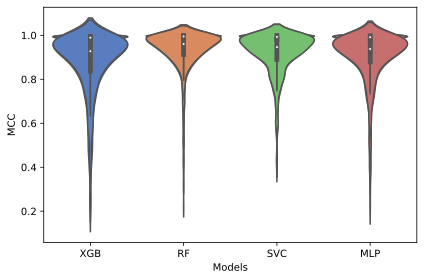

In [3]:
metrics = ['Accuracy', 'F1_Score', 'Cohen_Kappa', 'MCC']
models = ['XGB', 'RF', 'SVC', 'MLP']
for i in metrics:
    data = []
    for j in models:
        data.append(list(df[j.lower()+'_'+i.lower()]))
    ax = sns.violinplot(data= (data), palette="muted",scale='width')
    ax.set_xlabel('Models')
    ax.set_ylabel(i)
    ax.set_xticklabels(models)
    plt.rc('xtick', labelsize = 12 )
    plt.rc('ytick', labelsize = 12)
    plt.rcParams["axes.labelsize"] = 12
    plt.tight_layout()
#     plt.show()
    plt.savefig('plots/'+i,dpi=300)

### ***************Violin plot of Cohen Kappa vs best models********

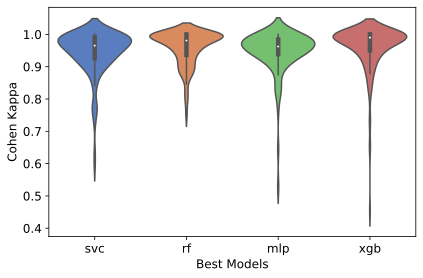

In [4]:
ax = sns.violinplot(x="best_model", y="best_score", data=df, palette="muted",scale='width', font_size=18)
ax.set_xlabel('Best Models')
ax.set_ylabel('Cohen Kappa')
plt.rc('xtick', labelsize = 12 )
plt.rc('ytick', labelsize = 12)
plt.rcParams["axes.labelsize"] = 12
plt.tight_layout()
plt.savefig('plots/'+'cohen_kappa_models',dpi=300)

### ***************Box plot of Cohen Kappa vs best models****************

In [5]:
scores = []
dfn = pd.DataFrame()
for m in metrics:
    metric=[]   
    for n in models:
        metric.extend(list(df[n.lower()+'_'+m.lower()]))
    dfn[m] = metric
    scores.append(metric)

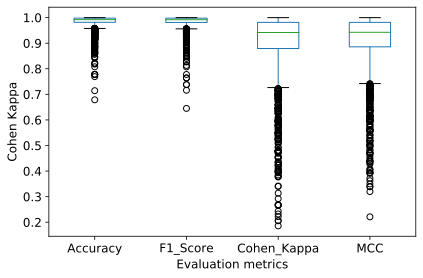

In [6]:
ndf=dfn.boxplot(grid=False)
ndf.set_xlabel('Evaluation metrics')
ndf.set_ylabel('Cohen Kappa')
plt.rc('xtick', labelsize = 12 )
plt.rc('ytick', labelsize = 12)
plt.rcParams["axes.labelsize"] = 12
plt.tight_layout()
plt.savefig('plots/'+'box_plot.png',dpi=1200)

### *************Histogram**************

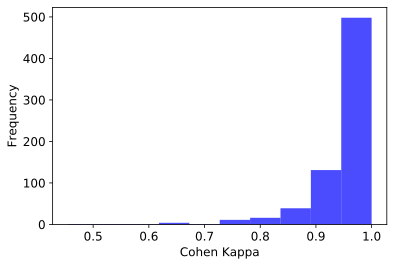

In [7]:
scores = df['best_score'].to_list()
num_bins = 10
n, bins, patches = plt.hist(scores, num_bins, facecolor='blue', alpha=0.7)
plt.xlabel('Cohen Kappa')
plt.ylabel('Frequency')
plt.rc('xtick', labelsize = 12 )
plt.rc('ytick', labelsize = 12)
plt.rcParams["axes.labelsize"] = 12
# plt.show()
plt.savefig('plots/cohen_kappa_freq', dpi = 300)

In [8]:
len(df[df['best_score']>=0.90])

616